<a href="https://colab.research.google.com/github/Saket1972/EARLY-CANCER-PREDICTION-USING-EPIGENOMICS/blob/main/LGG_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combined dataset shape: (381, 5001)
Selected feature count: 200

🔷 Support Vector Machine (SVM):
SVM Testing Accuracy (threshold=0.5): 0.961038961038961


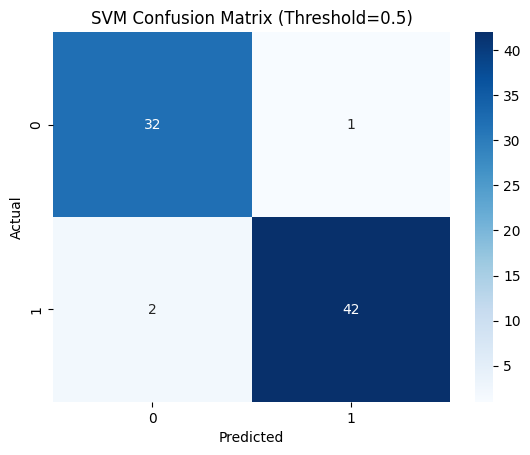

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.98      0.95      0.97        44

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77


🔷 Ridge Classifier:
Ridge Classifier Testing Accuracy: 0.922077922077922


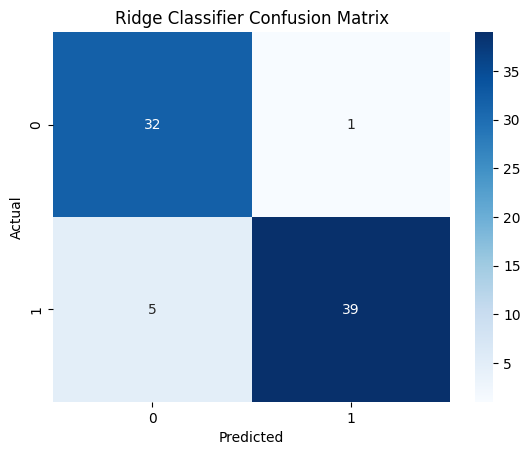

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.97      0.89      0.93        44

    accuracy                           0.92        77
   macro avg       0.92      0.93      0.92        77
weighted avg       0.93      0.92      0.92        77


🔷 ElasticNet Logistic Regression:
ElasticNet LR Testing Accuracy (threshold=0.5): 0.948051948051948


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


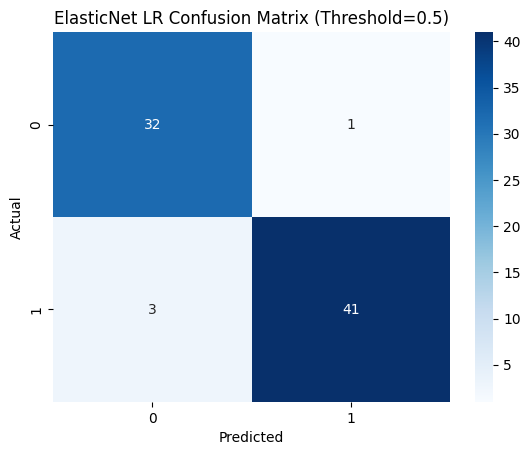

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.98      0.93      0.95        44

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77



In [ ]:
# 📝 Install required libraries
# !pip install xgboost lightgbm imbalanced-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression

# 🔗 Load and combine both datasets
file1 = pd.read_csv('/content/ML_ready_combined.csv')
file2 = pd.read_csv('/content/methylation_with_patient.csv')

# ✅ Drop patient name columns (assuming first column is names)
file1 = file1.iloc[:,1:]
file2 = file2.iloc[:,1:]

# 🔄 Combine
combined_df = pd.concat([file1, file2], axis=0).reset_index(drop=True)
print("Combined dataset shape:", combined_df.shape)

# ✅ Separate features and labels
X = combined_df.iloc[:,:-1]
y = combined_df.iloc[:,-1]

# 🔍 Replace "", "NA", etc. with np.nan
X.replace(["", "NA", "na", "N/A"], np.nan, inplace=True)

# 🔄 KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# ✨ Aggressive feature selection with SelectKBest (mutual_info_classif)
selector_kbest = SelectKBest(score_func=mutual_info_classif, k=200)  # adjust k as needed
X_selected = selector_kbest.fit_transform(X_imputed, y)

print("Selected feature count:", X_selected.shape[1])

# ⚖️ Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 🌟 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 🔬 Function to plot confusion matrix
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 🌟 Define threshold
threshold = 0.5

# ========== 🔵 MODEL 1: Support Vector Machine (SVM) ==========
print("\n🔷 Support Vector Machine (SVM):")
svc = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svc.fit(X_train, y_train)

# Internal test evaluation
y_prob_test_svc = svc.predict_proba(X_test)[:,1]
y_pred_test_svc = (y_prob_test_svc >= threshold).astype(int)

print(f"SVM Testing Accuracy (threshold={threshold}):", accuracy_score(y_test, y_pred_test_svc))
plot_confusion(y_test, y_pred_test_svc, f"SVM Confusion Matrix (Threshold={threshold})")
print(classification_report(y_test, y_pred_test_svc))


# ========== 🔵 MODEL 2: Ridge Classifier ==========
print("\n🔷 Ridge Classifier:")
ridge = RidgeClassifier(class_weight='balanced')
ridge.fit(X_train, y_train)

# Internal test evaluation
y_pred_test_ridge = ridge.predict(X_test)

print("Ridge Classifier Testing Accuracy:", accuracy_score(y_test, y_pred_test_ridge))
plot_confusion(y_test, y_pred_test_ridge, "Ridge Classifier Confusion Matrix")
print(classification_report(y_test, y_pred_test_ridge))


# ========== 🔵 MODEL 3: ElasticNet Logistic Regression ==========
print("\n🔷 ElasticNet Logistic Regression:")
lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Internal test evaluation
y_prob_test_lr = lr.predict_proba(X_test)[:,1]
y_pred_test_lr = (y_prob_test_lr >= threshold).astype(int)

print(f"ElasticNet LR Testing Accuracy (threshold={threshold}):", accuracy_score(y_test, y_pred_test_lr))
plot_confusion(y_test, y_pred_test_lr, f"ElasticNet LR Confusion Matrix (Threshold={threshold})")
print(classification_report(y_test, y_pred_test_lr))


In [ ]:
import pandas as pd

# Load Tanishq1 and Tanishq2, skipping the first row and using the second row as header
tanishq1 = pd.read_csv('/content/Tanishq1.csv', header=1).iloc[:,1:]
tanishq2 = pd.read_csv('/content/Tanishq2.csv', header=1).iloc[:,1:]

# Set column names same as training data X (ensure X is loaded from your training pipeline)
# Assuming X.columns from the previous cell is the correct set of CpG IDs
tanishq1.columns = X.columns
tanishq2.columns = X.columns

# Add 'class' column with value 1 (all cancer samples)
tanishq1['class'] = 1
tanishq2['class'] = 1

# ✅ Save back to new CSVs if needed
# tanishq1.to_csv('/content/Tanishq1_with_class.csv', index=False)
# tanishq2.to_csv('/content/Tanishq2_with_class.csv', index=False)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Function to preprocess and separate features and labels
def preprocess_test_data_with_labels(df):
    df.replace(["", "NA", "na", "N/A"], np.nan, inplace=True)
    X_test = df.iloc[:,:-1]
    y_test = df['class'].values

    # Impute
    X_imputed = imputer.transform(X_test)
    # Feature select
    X_selected = selector_kbest.transform(X_imputed)
    # Scale
    X_scaled = scaler.transform(X_selected)

    return X_scaled, y_test

# ✅ Function to evaluate with graphs
def evaluate_model_on_newdata_with_labels(X_new, y_true, model, model_name):
    y_prob = model.predict_proba(X_new)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_new)
    y_pred = (y_prob >= 0.5).astype(int)

    acc = accuracy_score(y_true, y_pred)
    print(f"\n🔷 {model_name} Accuracy:", acc)

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(classification_report(y_true, y_pred))



🔷 SVM (Tanishq1) Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


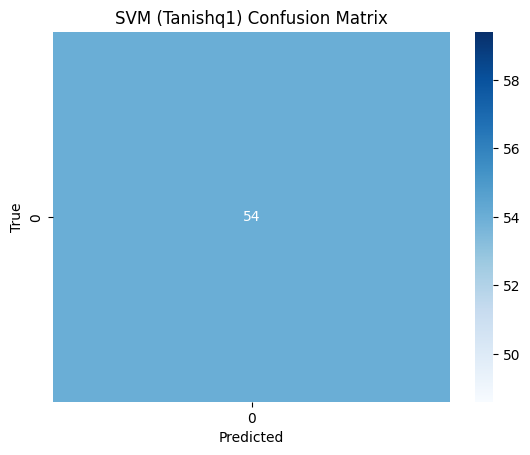

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


🔷 Ridge (Tanishq1) Accuracy: 0.8888888888888888


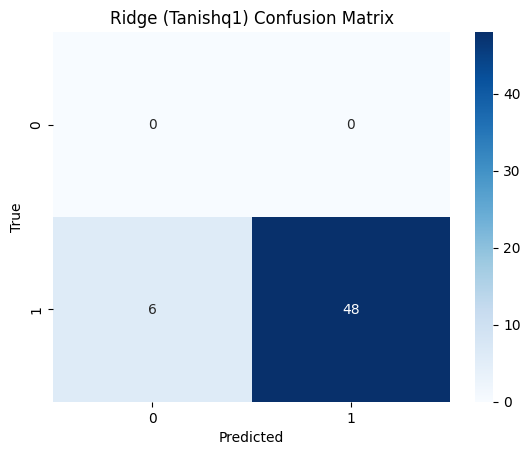

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.89      0.94        54

    accuracy                           0.89        54
   macro avg       0.50      0.44      0.47        54
weighted avg       1.00      0.89      0.94        54


🔷 ElasticNet LR (Tanishq1) Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

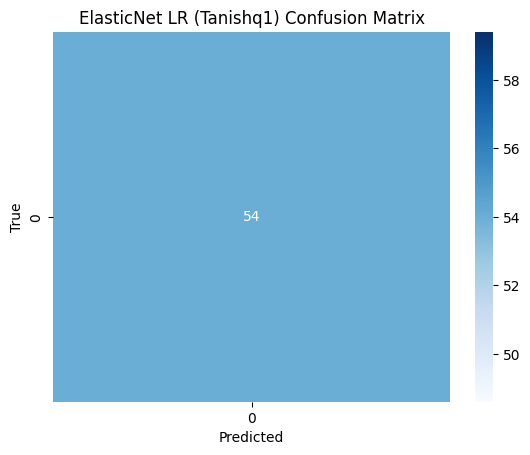

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
# 🔗 Preprocess Tanishq1
X_tanishq1, y_tanishq1 = preprocess_test_data_with_labels(tanishq1)

# 🔵 Evaluate all models on Tanishq1
evaluate_model_on_newdata_with_labels(X_tanishq1, y_tanishq1, svc, "SVM (Tanishq1)")
evaluate_model_on_newdata_with_labels(X_tanishq1, y_tanishq1, ridge, "Ridge (Tanishq1)")
evaluate_model_on_newdata_with_labels(X_tanishq1, y_tanishq1, lr, "ElasticNet LR (Tanishq1)")



🔷 SVM (Tanishq2) Accuracy: 0.9803921568627451


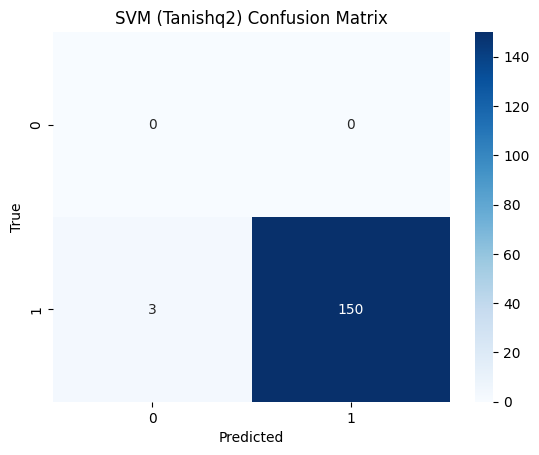

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       153

    accuracy                           0.98       153
   macro avg       0.50      0.49      0.50       153
weighted avg       1.00      0.98      0.99       153


🔷 Ridge (Tanishq2) Accuracy: 0.8823529411764706


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


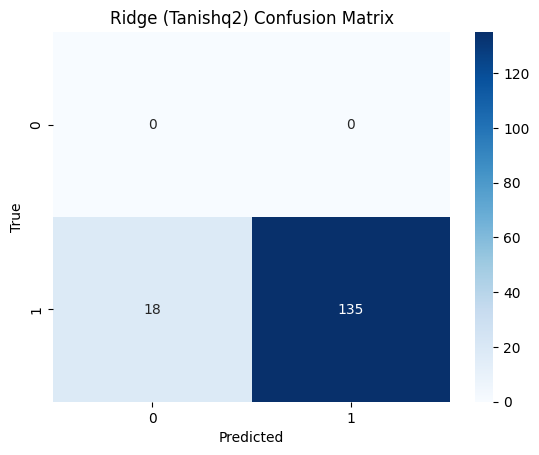

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.88      0.94       153

    accuracy                           0.88       153
   macro avg       0.50      0.44      0.47       153
weighted avg       1.00      0.88      0.94       153


🔷 ElasticNet LR (Tanishq2) Accuracy: 0.9934640522875817


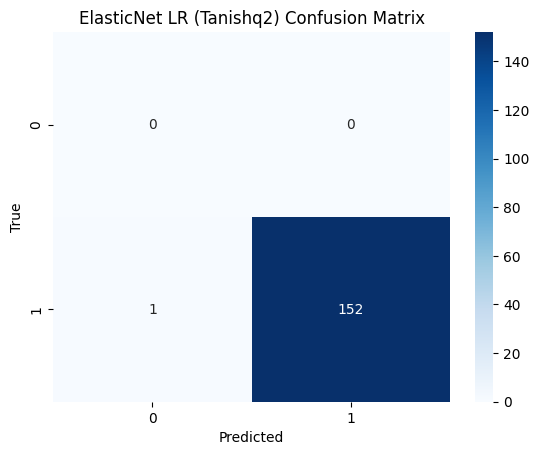

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      1.00       153

    accuracy                           0.99       153
   macro avg       0.50      0.50      0.50       153
weighted avg       1.00      0.99      1.00       153



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 🔗 Preprocess Tanishq2
X_tanishq2, y_tanishq2 = preprocess_test_data_with_labels(tanishq2)

# 🔵 Evaluate all models on Tanishq2
evaluate_model_on_newdata_with_labels(X_tanishq2, y_tanishq2, svc, "SVM (Tanishq2)")
evaluate_model_on_newdata_with_labels(X_tanishq2, y_tanishq2, ridge, "Ridge (Tanishq2)")
evaluate_model_on_newdata_with_labels(X_tanishq2, y_tanishq2, lr, "ElasticNet LR (Tanishq2)")



🔷 SVM (Combined) Accuracy: 0.9841269841269841


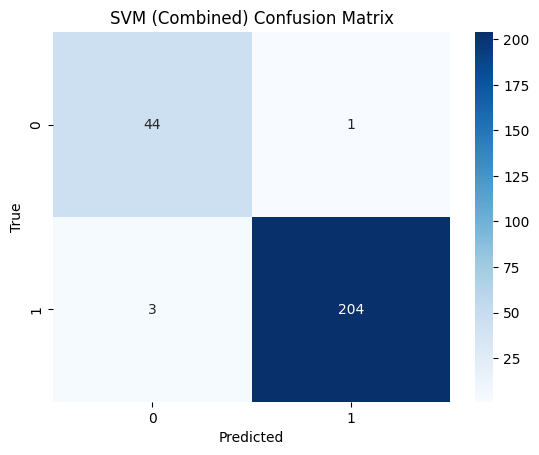

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      0.99      0.99       207

    accuracy                           0.98       252
   macro avg       0.97      0.98      0.97       252
weighted avg       0.98      0.98      0.98       252


🔷 Ridge (Combined) Accuracy: 0.9047619047619048


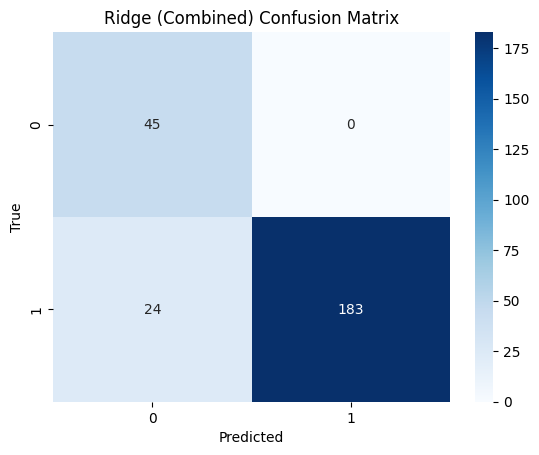

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        45
           1       1.00      0.88      0.94       207

    accuracy                           0.90       252
   macro avg       0.83      0.94      0.86       252
weighted avg       0.94      0.90      0.91       252


🔷 ElasticNet LR (Combined) Accuracy: 0.9920634920634921


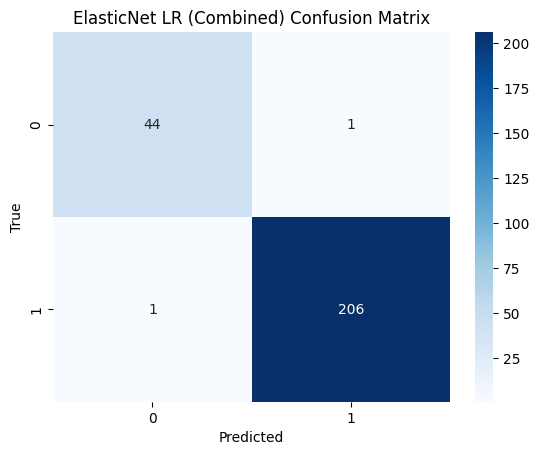

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       1.00      1.00      1.00       207

    accuracy                           0.99       252
   macro avg       0.99      0.99      0.99       252
weighted avg       0.99      0.99      0.99       252



In [ ]:
# 🔗 Load 45 normal samples from methylation_with_patient.csv
normal_df = pd.read_csv('/content/methylation_with_patient.csv').iloc[:,1:]
normal_df.columns = X.columns.tolist() + ['class']  # ensure correct columns

# ✅ Extract first 45 normal samples (class=0)
normal_45 = normal_df[normal_df['class']==0].head(45)

# 🔄 Combine Tanishq1, Tanishq2, and normal_45
combined_df = pd.concat([tanishq1, tanishq2, normal_45], axis=0).reset_index(drop=True)

# ✅ Preprocess combined data
X_combined, y_combined = preprocess_test_data_with_labels(combined_df)

# 🔵 Evaluate all models on combined dataset
evaluate_model_on_newdata_with_labels(X_combined, y_combined, svc, "SVM (Combined)")
evaluate_model_on_newdata_with_labels(X_combined, y_combined, ridge, "Ridge (Combined)")
evaluate_model_on_newdata_with_labels(X_combined, y_combined, lr, "ElasticNet LR (Combined)")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# ✅ Load the new cancer-only dataset
test_df = pd.read_csv('/content/LGG_patients_selected_CpGs_matrix_SIMPLE.csv')

# 🔷 Remove first column (patient names)
test_df = test_df.iloc[:,1:]

# ✅ Set column names to match training CpG site IDs if needed
test_df.columns = X.columns  # X is your training data features dataframe

# 🔷 Replace all missing indicators with np.nan
test_df.replace(["", "NA", "na", "N/A"], np.nan, inplace=True)

# ✅ Impute missing CpG site columns that are completely missing in test set
# (Set to training median value)
for col in X.columns:
    if col not in test_df.columns or test_df[col].isna().all():
        test_df[col] = X[col].median()

# 🔷 Impute other missing values (within partially missing columns) using training median
test_df = test_df.fillna(X.median())

# ✅ Ensure correct column order
test_df = test_df[X.columns]

# 🔷 Apply same feature selection (top 200 CpGs) using trained selector
X_test_selected = selector_kbest.transform(test_df)

# 🔷 Standardize using training scaler
X_test_scaled = scaler.transform(X_test_selected)

# ✅ Generate true labels (all cancer patients → class=1)
y_true = np.ones(X_test_scaled.shape[0])

# 🔷 Evaluate across three models
def evaluate_final(X_new, y_true, model, model_name):
    y_prob = model.predict_proba(X_new)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_new)
    y_pred = (y_prob >= 0.5).astype(int)

    acc = accuracy_score(y_true, y_pred)
    print(f"\n🔷 {model_name} Accuracy: {acc}")

    # Predicted class counts
    unique, counts = np.unique(y_pred, return_counts=True)
    print("Predicted Class Distribution:")
    for u, c in zip(unique, counts):
        print(f"Class {u}: {c}")

# 🔵 Evaluate SVM
evaluate_final(X_test_scaled, y_true, svc, "SVM")

# 🔵 Evaluate Ridge
evaluate_final(X_test_scaled, y_true, ridge, "Ridge")

# 🔵 Evaluate ElasticNet LR
evaluate_final(X_test_scaled, y_true, lr, "ElasticNet LR")



🔷 SVM Accuracy: 0.9660377358490566
Predicted Class Distribution:
Class 0: 18
Class 1: 512

🔷 Ridge Accuracy: 0.7981132075471699
Predicted Class Distribution:
Class 0: 107
Class 1: 423

🔷 ElasticNet LR Accuracy: 0.9754716981132076
Predicted Class Distribution:
Class 0: 13
Class 1: 517


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


Combined dataset shape: (543, 5002)
class
1    382
0    161
Name: count, dtype: int64
🔷 Top 10 CpGs by p-value:
            CpG        p_value  mean_diff
874  cg09410453  1.461780e-180  -1.803496
488  cg19991383  6.143325e-174  -1.808307
771  cg06858087  4.501175e-172  -1.747271
312  cg05002166  5.596499e-168  -1.779053
979  cg01115565  9.359015e-167  -1.758534
21   cg07781678  2.303187e-165  -1.893883
673  cg16422816  2.492270e-165  -1.795168
865  cg20043883  6.444262e-163  -1.754325
583  cg14494733  1.257623e-157  -1.754280
382  cg25552705  4.057136e-154  -1.743624


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



🔷 ElasticNet LR Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       382

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543


🔷 Top 10 CpGs by ElasticNet Coefficient:
             CpG  Coefficient
2638  cg14521995     0.165845
2251  cg05554543    -0.158569
380   cg04842472     0.145233
3496  cg04004830    -0.145223
4318  cg06636831     0.143877
408   cg26384382    -0.131797
4389  cg24853040    -0.130977
500   cg12379383     0.125634
3751  cg12315011    -0.123561
4478  cg02246683    -0.120470


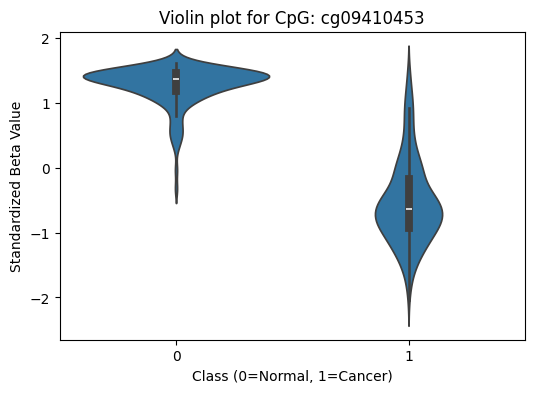

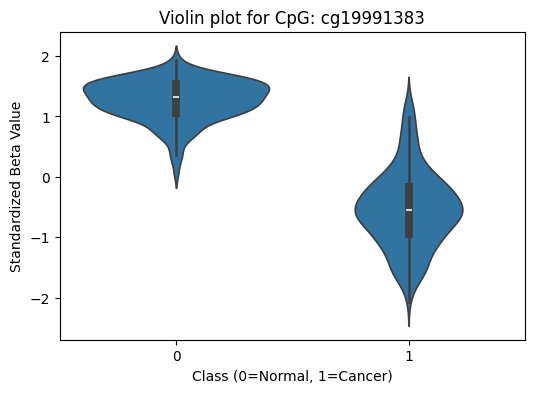

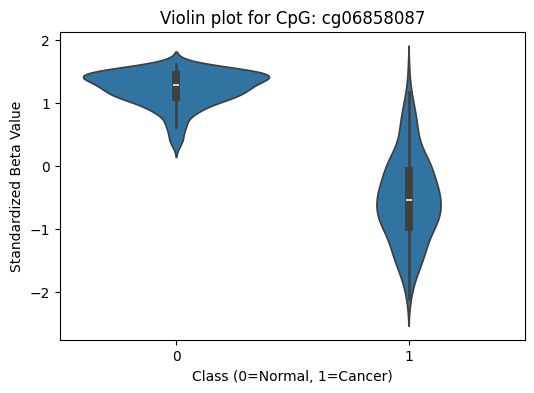

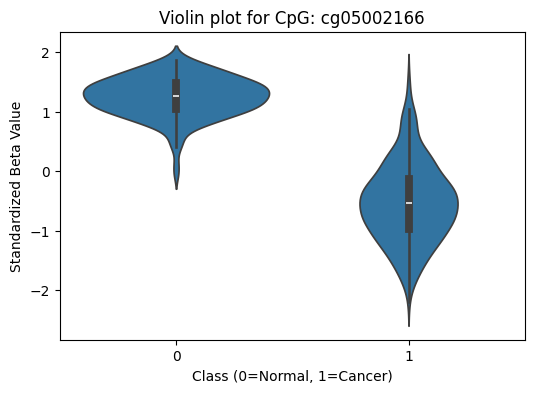

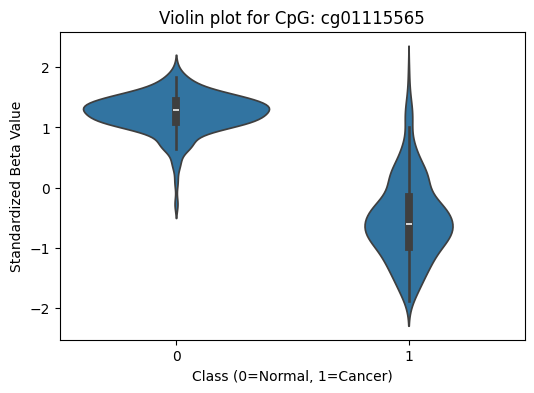

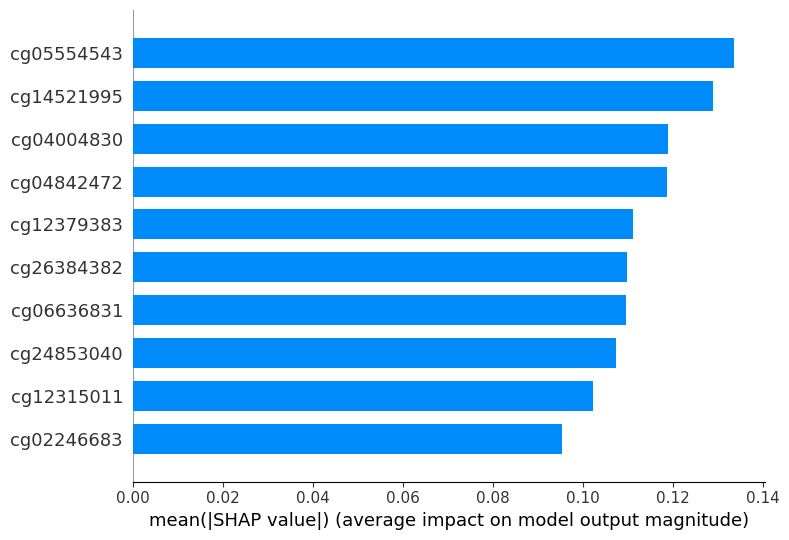

In [ ]:
# ✅ Install required packages if not already installed
!pip install shap

# 🔷 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import shap

# 🔷 Load datasets

# 1. ML_ready_combined.csv
ml_df = pd.read_csv('/content/ML_ready_combined.csv').iloc[:,1:]  # drop 'Patient' column

# 2. methylation_with_patient.csv (extract only 45 normal samples)
methylation_df = pd.read_csv('/content/methylation_with_patient.csv')
normal_df = methylation_df[methylation_df['class'] == 0].copy()

# 3. Tanishq1.csv
# Load Tanishq1 and Tanishq2, skipping the first row and using the second row as header
t1_df = pd.read_csv('/content/Tanishq1.csv', header=1).iloc[:,1:]
t1_df.columns = ml_df.columns[:-1]  # Assign same CpG column names (excluding class)
t1_df['class'] = 1  # Cancer samples

# 4. Tanishq2.csv
t2_df = pd.read_csv('/content/Tanishq2.csv', header=1).iloc[:,1:]
t2_df.columns = ml_df.columns[:-1]
t2_df['class'] = 1  # Cancer samples

# ✅ Combine all datasets
combined_df = pd.concat([ml_df, normal_df, t1_df, t2_df], ignore_index=True)

print(f"Combined dataset shape: {combined_df.shape}")
print(combined_df['class'].value_counts())

# 🔷 Data preprocessing

# Drop 'Patient' and 'class' columns **only if they exist**
drop_cols = [col for col in ['Patient', 'class'] if col in combined_df.columns]
X = combined_df.drop(columns=drop_cols)
y = combined_df['class']

# ✅ Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# ✅ Impute missing values with median (CpG-wise)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ✅ Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)


# 🔷 Step 1. Statistical testing (t-test)
ttest_results = []
for cpg in X_scaled.columns:
    cancer_values = X_scaled[y == 1][cpg]
    normal_values = X_scaled[y == 0][cpg]
    # Handle potential empty groups after filtering
    if not cancer_values.empty and not normal_values.empty:
        t_stat, p_val = ttest_ind(cancer_values, normal_values, equal_var=False)
        mean_diff = cancer_values.mean() - normal_values.mean()
        ttest_results.append([cpg, p_val, mean_diff])
    else:
        # Handle cases with only one class present for a CpG
        p_val = np.nan # Or a large value indicating no significant difference
        mean_diff = cancer_values.mean() - normal_values.mean() if not cancer_values.empty or not normal_values.empty else np.nan
        ttest_results.append([cpg, p_val, mean_diff])


ttest_df = pd.DataFrame(ttest_results, columns=['CpG', 'p_value', 'mean_diff'])
ttest_df.sort_values('p_value', inplace=True)

print("🔷 Top 10 CpGs by p-value:")
print(ttest_df.head(10))

# 🔷 Step 2. ElasticNet Logistic Regression for feature importance
from sklearn.linear_model import LogisticRegression
elastic_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000, random_state=42)
elastic_model.fit(X_scaled, y)

# ✅ Model evaluation
y_pred = elastic_model.predict(X_scaled)
print("\n🔷 ElasticNet LR Training Classification Report:")
print(classification_report(y, y_pred))

# 🔷 Extract feature importances
coef_df = pd.DataFrame({
    'CpG': X_scaled.columns,
    'Coefficient': elastic_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n🔷 Top 10 CpGs by ElasticNet Coefficient:")
print(coef_df.head(10))

# 🔷 Step 3. Visualizations

## Violin plots for top 5 CpGs (by p-value)
# Ensure ttest_df has enough rows after potential filtering of NaNs
top5_cpgs = ttest_df.dropna(subset=['p_value']).head(5)['CpG'].tolist()
for cpg in top5_cpgs:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=y, y=X_scaled[cpg])
    plt.title(f'Violin plot for CpG: {cpg}')
    plt.xlabel('Class (0=Normal, 1=Cancer)')
    plt.ylabel('Standardized Beta Value')
    plt.show()

# 🔷 SHAP feature importance
# Check if the model has a decision_function or predict_proba method before creating the explainer
if hasattr(elastic_model, "decision_function") or hasattr(elastic_model, "predict_proba"):
    explainer = shap.LinearExplainer(elastic_model, X_scaled)
    shap_values = explainer(X_scaled)

    shap.summary_plot(shap_values, X_scaled, plot_type="bar", max_display=10)
else:
    print("SHAP explainer not supported for this model type.")

In [ ]:
top30 = ttest_df.dropna().head(30)
top30['Direction'] = top30['mean_diff'].apply(lambda x: 'Hypo' if x > 0 else 'Hyper')
print(top30['Direction'].value_counts())


Direction
Hyper    24
Hypo      6
Name: count, dtype: int64


In [ ]:
# Next 10 CpGs ranked by p-value (11th to 20th)
next10_ttest_df = ttest_df.iloc[10:20]
print("🔷 CpGs ranked 11–20 by p-value:")
print(next10_ttest_df)


🔷 CpGs ranked 11–20 by p-value:
             CpG        p_value  mean_diff
35    cg13367234  7.340480e-153  -1.878884
4837  cg20406460  8.525256e-150   1.654210
4152  cg13729210  2.685218e-149   1.647415
106   cg04593880  8.392499e-149  -1.831838
682   cg14011070  1.678247e-148  -1.679243
36    cg09342325  1.198617e-147  -1.900920
323   cg17958291  2.106460e-147  -1.812148
76    cg12988813  3.823225e-147  -1.711699
839   cg22405226  1.384449e-146  -1.737005
217   cg24932457  1.802646e-146   1.708189


In [ ]:
# Next 10 CpGs ranked by absolute ElasticNet coefficient (11th to 20th)
next10_coef_df = coef_df.iloc[10:20]
print("🔷 CpGs ranked 11–20 by ElasticNet Coefficient magnitude:")
print(next10_coef_df)


🔷 CpGs ranked 11–20 by ElasticNet Coefficient magnitude:
             CpG  Coefficient
1899  cg15877399    -0.115149
1579  cg15996397    -0.109208
550   cg21538208     0.108054
3968  cg14412490    -0.104783
1652  cg22989533    -0.103447
4898  cg17054060     0.097655
1582  cg03349020     0.096041
868   cg21203569    -0.094760
3537  cg01477319    -0.094261
3687  cg15073784    -0.092388


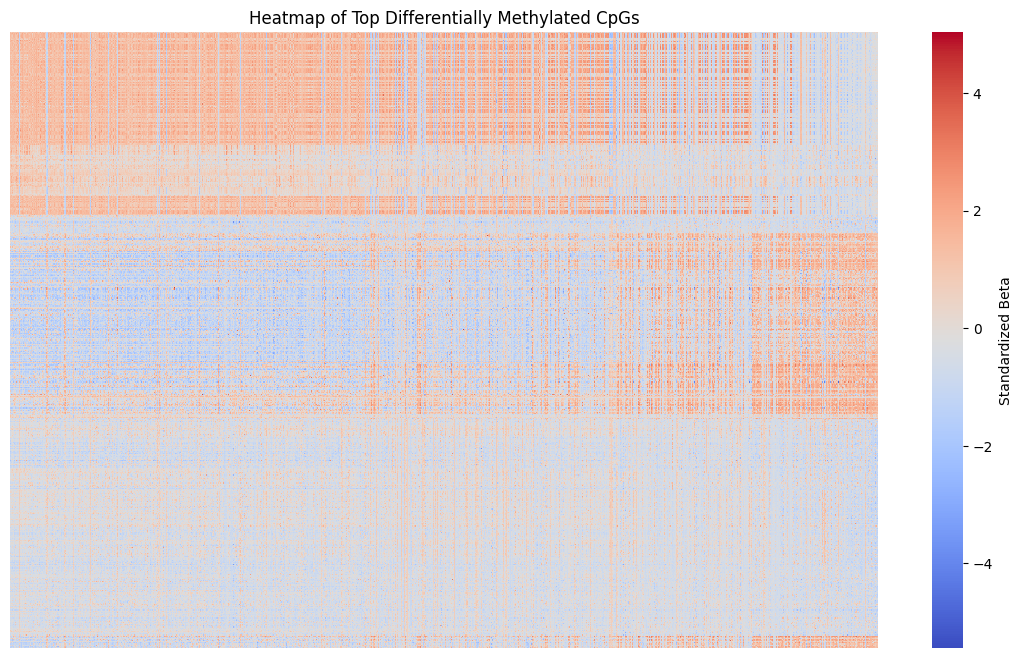

In [ ]:
# 🔷 Filter CpGs with p-value < 0.01 and abs(mean_diff) > 0.2
top_dm_cpgs = ttest_df[(ttest_df['p_value'] < 0.01) & (ttest_df['mean_diff'].abs() > 0.2)].CpG.tolist()

# 🔷 Subset and sort by class
heatmap_df = X_scaled[top_dm_cpgs].copy()
heatmap_df['class'] = y.values
heatmap_df = heatmap_df.sort_values(by='class')
row_colors = heatmap_df['class'].map({0: 'yellow', 1: 'red'})
heatmap_df = heatmap_df.drop(columns='class')

# 🔷 Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_df, cmap='coolwarm', yticklabels=False, xticklabels=False, cbar_kws={'label': 'Standardized Beta'})
plt.title('Heatmap of Top Differentially Methylated CpGs')
plt.show()

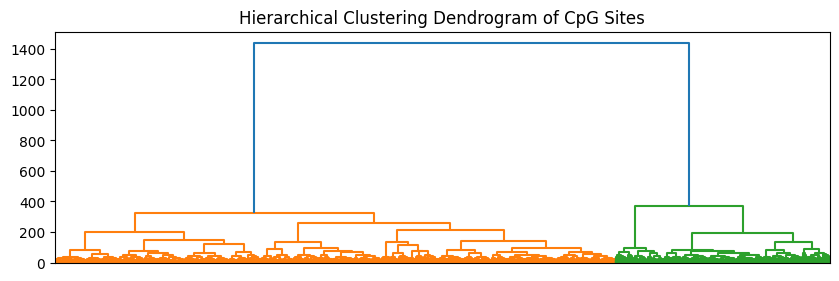

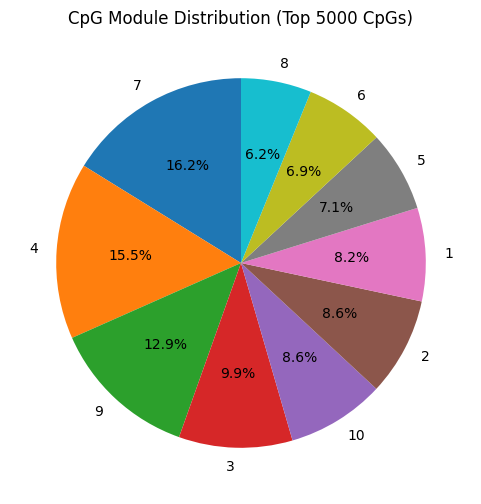

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

top5000_cpgs = X_scaled.var().sort_values(ascending=False).head(5000).index
X_top = X_scaled[top5000_cpgs]

# 🔷 Hierarchical clustering
linkage_matrix = linkage(X_top.T, method='ward')
cluster_labels = fcluster(linkage_matrix, t=10, criterion='maxclust')

# 🔷 Dendrogram
plt.figure(figsize=(10, 3))
dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram of CpG Sites')
plt.show()

# 🔷 Pie chart of module sizes
pd.Series(cluster_labels).value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('CpG Module Distribution (Top 5000 CpGs)')
plt.ylabel('')
plt.show()

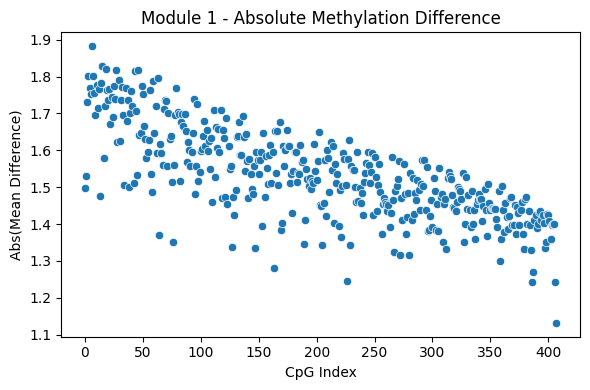

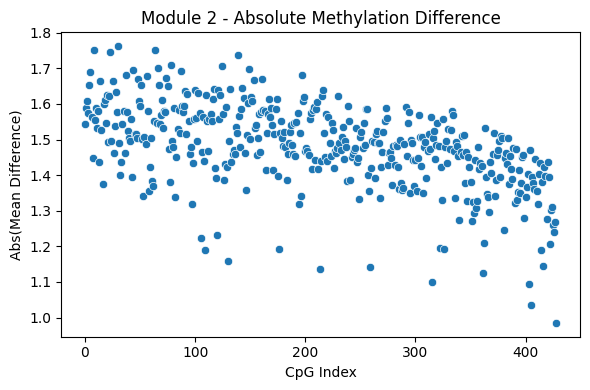

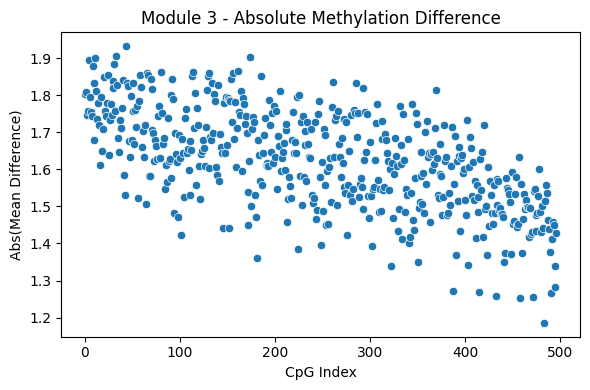

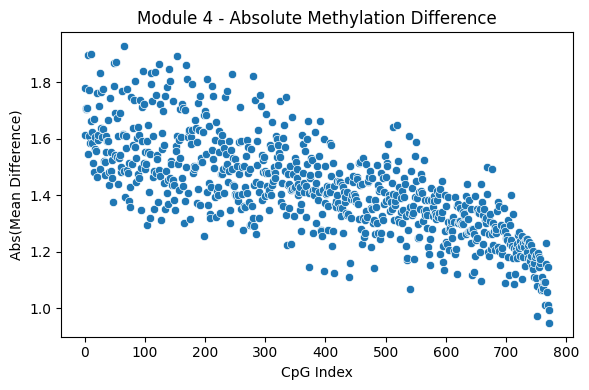

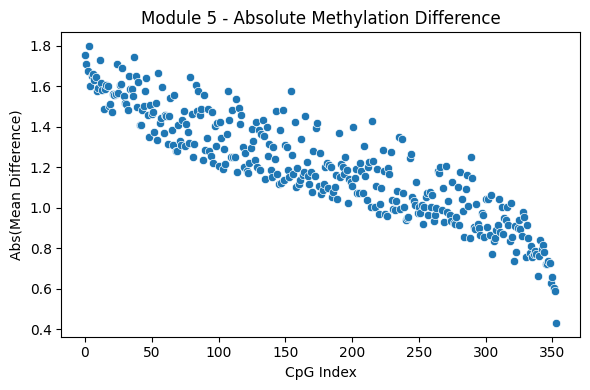

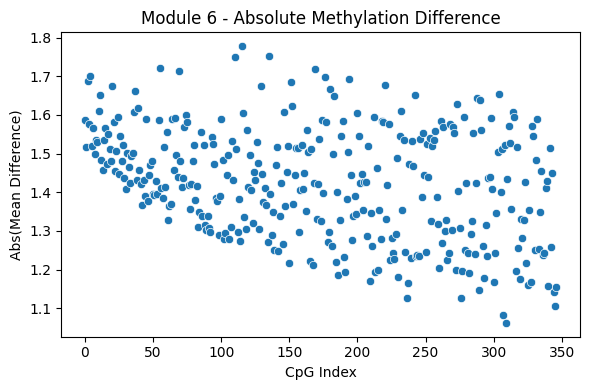

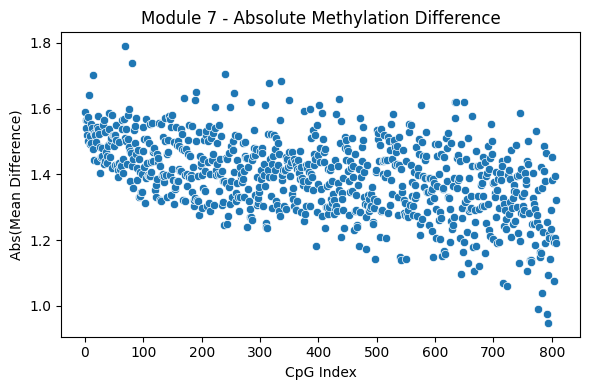

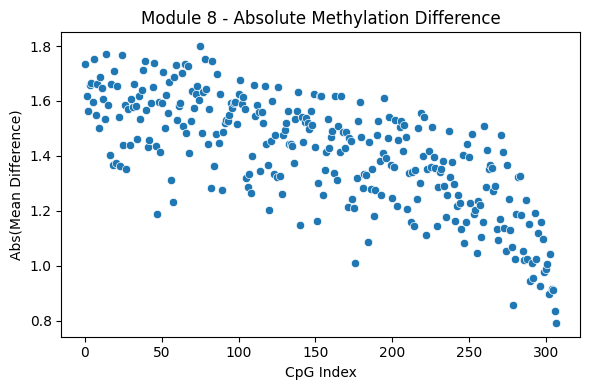

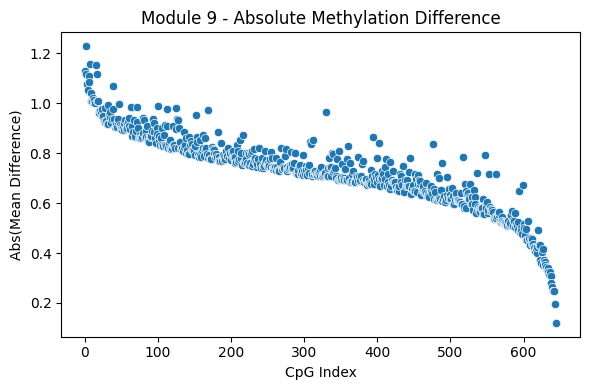

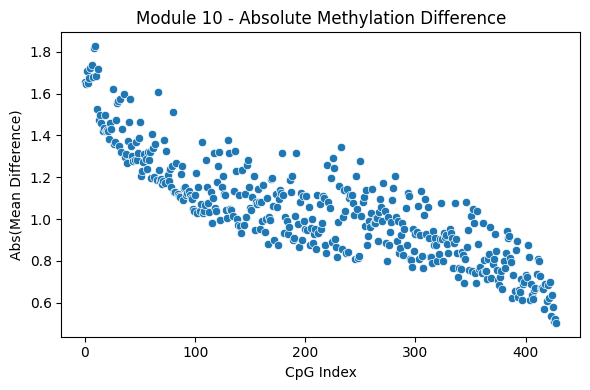

In [ ]:
# 🔷 Merge clustering info with t-test stats
cluster_df = pd.DataFrame({'CpG': top5000_cpgs, 'Module': cluster_labels})
merged_df = ttest_df.merge(cluster_df, on='CpG')

# 🔷 Scatter plot for each module
for mod_id in sorted(merged_df['Module'].unique()):
    module_data = merged_df[merged_df['Module'] == mod_id]
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=range(len(module_data)), y=module_data['mean_diff'].abs())
    plt.title(f'Module {mod_id} - Absolute Methylation Difference')
    plt.xlabel('CpG Index')
    plt.ylabel('Abs(Mean Difference)')
    plt.tight_layout()
    plt.show()

In [ ]:
# 🔷 Step 4. Get Top 200 CpGs based on absolute coefficient magnitude
top200_cpgs = coef_df.head(200)['CpG'].tolist()

# 🔷 Step 5. Compute relative methylation (mean in normal vs cancer) for top CpGs
methylation_summary = []

for cpg in top200_cpgs:
    cancer_values = X_scaled[y == 1][cpg]
    normal_values = X_scaled[y == 0][cpg]

    methylation_summary.append({
        'CpG': cpg,
        'Mean_Cancer': cancer_values.mean(),
        'Mean_Normal': normal_values.mean(),
        'Mean_Diff (Cancer - Normal)': cancer_values.mean() - normal_values.mean()
    })

# 🔷 Step 6. Create summary DataFrame
methylation_summary_df = pd.DataFrame(methylation_summary)

# Sort by absolute difference
methylation_summary_df['|Mean_Diff|'] = methylation_summary_df['Mean_Diff (Cancer - Normal)'].abs()
methylation_summary_df = methylation_summary_df.sort_values(by='|Mean_Diff|', ascending=False)

# 🔷 Step 7. Display
pd.set_option('display.max_rows', 200)
print("\n🔷 Top 200 CpGs with relative methylation (based on ElasticNet coefficients):")
display(methylation_summary_df[['CpG', 'Mean_Normal', 'Mean_Cancer', 'Mean_Diff (Cancer - Normal)']])




🔷 Top 200 CpGs with relative methylation (based on ElasticNet coefficients):


,CpG,Mean_Normal,Mean_Cancer,Mean_Diff (Cancer - Normal)
134,cg17452006,1.285443,-0.541771,-1.827214
39,cg25308508,-1.284810,0.541504,1.826314
104,cg19814981,-1.279352,0.539203,1.818555
115,cg04628369,1.277442,-0.538398,-1.815841
41,cg14171514,1.248507,-0.526203,-1.774710
187,cg13892514,1.239749,-0.522512,-1.762262
91,cg17492965,1.231506,-0.519038,-1.750543
93,cg09183450,1.223615,-0.515712,-1.739327
96,cg13712023,1.222456,-0.515223,-1.737679
67,cg14088921,1.221388,-0.514774,-1.736162


In [ ]:
# 🔷 Step 8. Read the CSV with gene annotations
annotations_df = pd.read_csv("/content/Cpg-Gene-Region-ElasticNet.csv")  # Adjust the path if needed

# Rename the 'Name' column to 'CpG' to match the main dataframe
annotations_df = annotations_df.rename(columns={"Name": "CpG"})

# 🔷 Step 9. Merge the annotation data into your methylation summary
merged_df = pd.merge(
    methylation_summary_df,
    annotations_df,
    on="CpG",
    how="left"   # ensures all 200 CpGs are retained even if annotation is missing
)

# 🔷 Step 10. Display the full merged table (with NA for missing annotations)
pd.set_option('display.max_rows', 200)
display(merged_df[['CpG', 'Mean_Normal', 'Mean_Cancer', 'Mean_Diff (Cancer - Normal)',
                   'UCSC_RefGene_Name', 'UCSC_RefGene_Group']])

# 🔻 Save to CSV and create download link
output_path = "/content/ElasticNet_Merged_Table.csv"
merged_df.to_csv(output_path, index=False)

from google.colab import files
files.download(output_path)


,CpG,Mean_Normal,Mean_Cancer,Mean_Diff (Cancer - Normal),UCSC_RefGene_Name,UCSC_RefGene_Group
0,cg17452006,1.285443,-0.541771,-1.827214,OLA1,Body
1,cg25308508,-1.284810,0.541504,1.826314,NaN,NaN
2,cg19814981,-1.279352,0.539203,1.818555,NaN,NaN
3,cg04628369,1.277442,-0.538398,-1.815841,PMEPA1;PMEPA1,5'UTR;Body
4,cg14171514,1.248507,-0.526203,-1.774710,AHNAK,5'UTR
5,cg13892514,1.239749,-0.522512,-1.762262,NaN,NaN
6,cg17492965,1.231506,-0.519038,-1.750543,NaN,NaN
7,cg09183450,1.223615,-0.515712,-1.739327,NaN,NaN
8,cg13712023,1.222456,-0.515223,-1.737679,NaN,NaN
9,cg14088921,1.221388,-0.514774,-1.736162,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 🔷 Step 11. Count how many CpGs have missing gene annotations
num_missing = merged_df['UCSC_RefGene_Name'].isna().sum()
print(f"\n🔹 Number of CpG sites with missing gene annotation: {num_missing} out of {len(merged_df)}")

# 🔷 Step 12. Count how many unique genes are present (excluding NAs)
# If multiple gene names are present in one cell, split them
genes_series = merged_df['UCSC_RefGene_Name'].dropna().str.split(';|,').explode()
unique_genes = genes_series.str.strip().nunique()
print(f"🔹 Number of unique genes (excluding missing): {unique_genes}")


🔹 Number of CpG sites with missing gene annotation: 67 out of 200
🔹 Number of unique genes (excluding missing): 138


In [ ]:
import pandas as pd
import numpy as np

# Your 20 CpG sites of interest
your_cpgs = [
    "cg01115565", "cg05002166", "cg25552705", "cg19991383", "cg07781678",
    "cg20043883", "cg14494733", "cg06858087", "cg16422816", "cg09410453",
    "cg24932457", "cg15073784", "cg15996397", "cg21538208", "cg13729210",
    "cg12988813", "cg17958291", "cg14412490", "cg15877399", "cg22989533"
]

# Get the top 200 CpG sites (as column names) from feature selection
top_200_cpgs = selector_kbest.get_feature_names_out()

# Create a DataFrame to store results
results = []

for cpg in your_cpgs:
    if cpg in top_200_cpgs:
        position = list(top_200_cpgs).index(cpg) + 1  # 1-based index
        idx = list(top_200_cpgs).index(cpg)
        methyl_values = X_selected[:, idx]

        normal_meth = methyl_values[y == 0].mean()
        cancer_meth = methyl_values[y == 1].mean()
        diff = cancer_meth - normal_meth

        results.append({
            "CpG": cpg,
            "Position": position,
            "Normal Mean": round(normal_meth, 4),
            "Cancer Mean": round(cancer_meth, 4),
            "Cancer - Normal": round(diff, 4)
        })
    else:
        results.append({
            "CpG": cpg,
            "Position": "Not in top 200",
            "Normal Mean": "N/A",
            "Cancer Mean": "N/A",
            "Cancer - Normal": "N/A"
        })

# Convert to DataFrame and display
result_df = pd.DataFrame(results)
print(result_df)

# Optional: Save to CSV
result_df.to_csv("CpG_methylation_comparison.csv", index=False)


           CpG        Position Normal Mean Cancer Mean Cancer - Normal
0   cg01115565  Not in top 200         N/A         N/A             N/A
1   cg05002166  Not in top 200         N/A         N/A             N/A
2   cg25552705  Not in top 200         N/A         N/A             N/A
3   cg19991383  Not in top 200         N/A         N/A             N/A
4   cg07781678  Not in top 200         N/A         N/A             N/A
5   cg20043883  Not in top 200         N/A         N/A             N/A
6   cg14494733  Not in top 200         N/A         N/A             N/A
7   cg06858087  Not in top 200         N/A         N/A             N/A
8   cg16422816  Not in top 200         N/A         N/A             N/A
9   cg09410453  Not in top 200         N/A         N/A             N/A
10  cg24932457  Not in top 200         N/A         N/A             N/A
11  cg15073784  Not in top 200         N/A         N/A             N/A
12  cg15996397  Not in top 200         N/A         N/A             N/A
13  cg

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np

# Drop label and patient ID columns if they exist
X = combined_df.drop(columns=['class', 'Patient'], errors='ignore')
y = combined_df['class']

# 🔹 Impute missing values with column means
X_imputed = X.fillna(X.mean())

# 🔹 Compute mutual information scores
mi_scores = mutual_info_classif(X_imputed, y, discrete_features=False, random_state=42)

# 🔹 Store in DataFrame
mi_df = pd.DataFrame({'CpG': X.columns, 'MI_Score': mi_scores})

# 🔹 Sort and extract top 30 CpGs
top200_df = mi_df.sort_values(by='MI_Score', ascending=False).head(200).reset_index(drop=True)

# 🔹 Output results
print(top200_df)

# Optional: Save to file
# top30_df.to_csv("top_30_cpg_sites_by_MI.csv", index=False)



            CpG  MI_Score
0    cg13367234  0.521617
1    cg09342325  0.516615
2    cg07781678  0.510523
3    cg20418125  0.506242
4    cg16413763  0.504628
5    cg04593880  0.503845
6    cg09749669  0.503402
7    cg16175703  0.501565
8    cg17277939  0.501279
9    cg15944367  0.501028
10   cg08667600  0.499384
11   cg04572258  0.497048
12   cg04195226  0.494813
13   cg06009215  0.494065
14   cg01150411  0.493392
15   cg23490077  0.492914
16   cg24545964  0.492875
17   cg22430985  0.491091
18   cg19991383  0.490477
19   cg06858087  0.490292
20   cg26110834  0.490260
21   cg16118379  0.488780
22   cg20366397  0.486613
23   cg18410945  0.486235
24   cg02724472  0.484925
25   cg14494733  0.484214
26   cg09632136  0.484029
27   cg26514793  0.483967
28   cg04578362  0.482080
29   cg19509663  0.481943
30   cg00246969  0.481487
31   cg11755201  0.480415
32   cg13321745  0.479681
33   cg00089814  0.478241
34   cg05143345  0.476822
35   cg05276184  0.476622
36   cg26320504  0.476573
37   cg06616

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np

# 🔹 Drop label and patient ID columns if they exist
X = combined_df.drop(columns=['class', 'Patient'], errors='ignore')
y = combined_df['class']

# 🔹 Impute missing values with column means
X_imputed = X.fillna(X.mean())

# 🔹 Compute mutual information scores
mi_scores = mutual_info_classif(X_imputed, y, discrete_features=False, random_state=42)

# 🔹 Store in DataFrame
mi_df = pd.DataFrame({'CpG': X.columns, 'MI_Score': mi_scores})

# 🔹 Sort and extract top 200 CpGs
top200_df = mi_df.sort_values(by='MI_Score', ascending=False).head(200).reset_index(drop=True)

# ────────────────────────────────────────────────
# 🔸 Compute relative methylation statistics
methylation_stats = []

for cpg in top200_df['CpG']:
    cancer_mean = X_imputed[y == 1][cpg].mean()
    normal_mean = X_imputed[y == 0][cpg].mean()
    diff = cancer_mean - normal_mean
    direction = "Hyper" if diff > 0 else "Hypo"

    methylation_stats.append({
        'CpG': cpg,
        'Mean_Cancer': cancer_mean,
        'Mean_Normal': normal_mean,
        'Mean_Diff': diff,
        'Direction': direction
    })

# 🔸 Create methylation DataFrame
methylation_df = pd.DataFrame(methylation_stats)

# 🔸 Merge with original top 200 MI DataFrame (same order)
final_df = pd.merge(top200_df, methylation_df, on='CpG', how='left')

# 🔹 Output
print(final_df)

# 🔹 Optional: Save to file
# final_df.to_csv("top_200_mi_with_methylation.csv", index=False)


            CpG  MI_Score  Mean_Cancer  Mean_Normal  Mean_Diff Direction
0    cg13367234  0.521617     0.387153     0.820296  -0.433144      Hypo
1    cg09342325  0.516615     0.318724     0.736125  -0.417401      Hypo
2    cg07781678  0.510523     0.392270     0.842226  -0.449956      Hypo
3    cg20418125  0.506242     0.298296     0.719762  -0.421466      Hypo
4    cg16413763  0.504628     0.260932     0.690078  -0.429146      Hypo
5    cg04593880  0.503845     0.295616     0.558012  -0.262396      Hypo
6    cg09749669  0.503402     0.264166     0.630508  -0.366341      Hypo
7    cg16175703  0.501565     0.340949     0.708080  -0.367130      Hypo
8    cg17277939  0.501279     0.342822     0.696871  -0.354050      Hypo
9    cg15944367  0.501028     0.388126     0.691478  -0.303352      Hypo
10   cg08667600  0.499384     0.357651     0.741886  -0.384235      Hypo
11   cg04572258  0.497048     0.244610     0.558054  -0.313444      Hypo
12   cg04195226  0.494813     0.266852     0.611287

In [ ]:
# 🔹 Step 1: Load the annotation CSV (for MI CpGs)
mi_annotations = pd.read_csv("/content/Cpg-Gene-Region-MI.csv")  # adjust path if needed

# 🔹 Step 2: Rename 'Name' column to match CpG column
mi_annotations = mi_annotations.rename(columns={"Name": "CpG"})

# 🔹 Step 3: Merge annotations into your MI dataframe
merged_mi_df = pd.merge(
    final_df,
    mi_annotations,
    on="CpG",
    how="left"  # keep all 200 CpGs even if some annotations are missing
)

# 🔹 Step 4: Display full merged table
pd.set_option('display.max_rows', 200)
display(merged_mi_df[['CpG', 'MI_Score', 'Mean_Normal', 'Mean_Cancer', 'Mean_Diff', 'Direction',
                      'UCSC_RefGene_Name', 'UCSC_RefGene_Group']])

# 🔹 Step 5: Count missing and unique genes
num_missing_mi = merged_mi_df['UCSC_RefGene_Name'].isna().sum()
print(f"\n🔹 Number of CpG sites with missing gene annotation: {num_missing_mi} out of {len(merged_mi_df)}")

# Count unique gene names (split multi-gene fields like "GENE1;GENE2")
genes_series_mi = merged_mi_df['UCSC_RefGene_Name'].dropna().str.split(';|,').explode()
unique_gene_count_mi = genes_series_mi.str.strip().nunique()
print(f"🔹 Number of unique genes (excluding missing): {unique_gene_count_mi}")

# 🔹 Step 6: Save the merged MI table to CSV
merged_mi_df.to_csv("/content/MI_Merged_Table.csv", index=False)

# Optional: Provide download link in Colab
from google.colab import files
files.download("/content/MI_Merged_Table.csv")



,CpG,MI_Score,Mean_Normal,Mean_Cancer,Mean_Diff,Direction,UCSC_RefGene_Name,UCSC_RefGene_Group
0,cg13367234,0.521617,0.820296,0.387153,-0.433144,Hypo,CROCC,Body
1,cg09342325,0.516615,0.736125,0.318724,-0.417401,Hypo,GMPPA,3'UTR
2,cg07781678,0.510523,0.842226,0.392270,-0.449956,Hypo,NaN,NaN
3,cg20418125,0.506242,0.719762,0.298296,-0.421466,Hypo,OPCML,Body
4,cg16413763,0.504628,0.690078,0.260932,-0.429146,Hypo,MYO10,Body
5,cg04593880,0.503845,0.558012,0.295616,-0.262396,Hypo,NaN,NaN
6,cg09749669,0.503402,0.630508,0.264166,-0.366341,Hypo,SOX6,3'UTR
7,cg16175703,0.501565,0.708080,0.340949,-0.367130,Hypo,NaN,NaN
8,cg17277939,0.501279,0.696871,0.342822,-0.354050,Hypo,BEST3;BEST3,1stExon;5'UTR
9,cg15944367,0.501028,0.691478,0.388126,-0.303352,Hypo,PCGF2,5'UTR



🔹 Number of CpG sites with missing gene annotation: 75 out of 200
🔹 Number of unique genes (excluding missing): 108


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

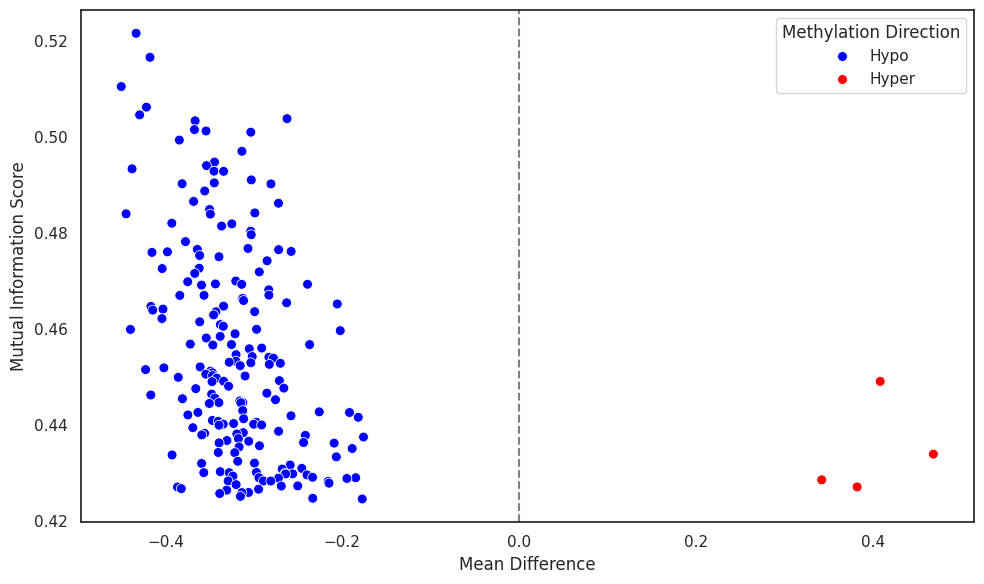

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Volcano plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Mean_Diff',
    y='MI_Score',
    hue='Direction',      # Hyper/Hypo
    palette={'Hyper':'red', 'Hypo':'blue'},
    data=merged_mi_df,
    s=50
)
plt.axvline(0, color='grey', linestyle='--')

plt.xlabel("Mean Difference")
plt.ylabel("Mutual Information Score")
plt.legend(title='Methylation Direction')
plt.tight_layout()

# Save and download
plt.savefig("volcano_plot.png", dpi=300)

from google.colab import files
files.download("volcano_plot.png")


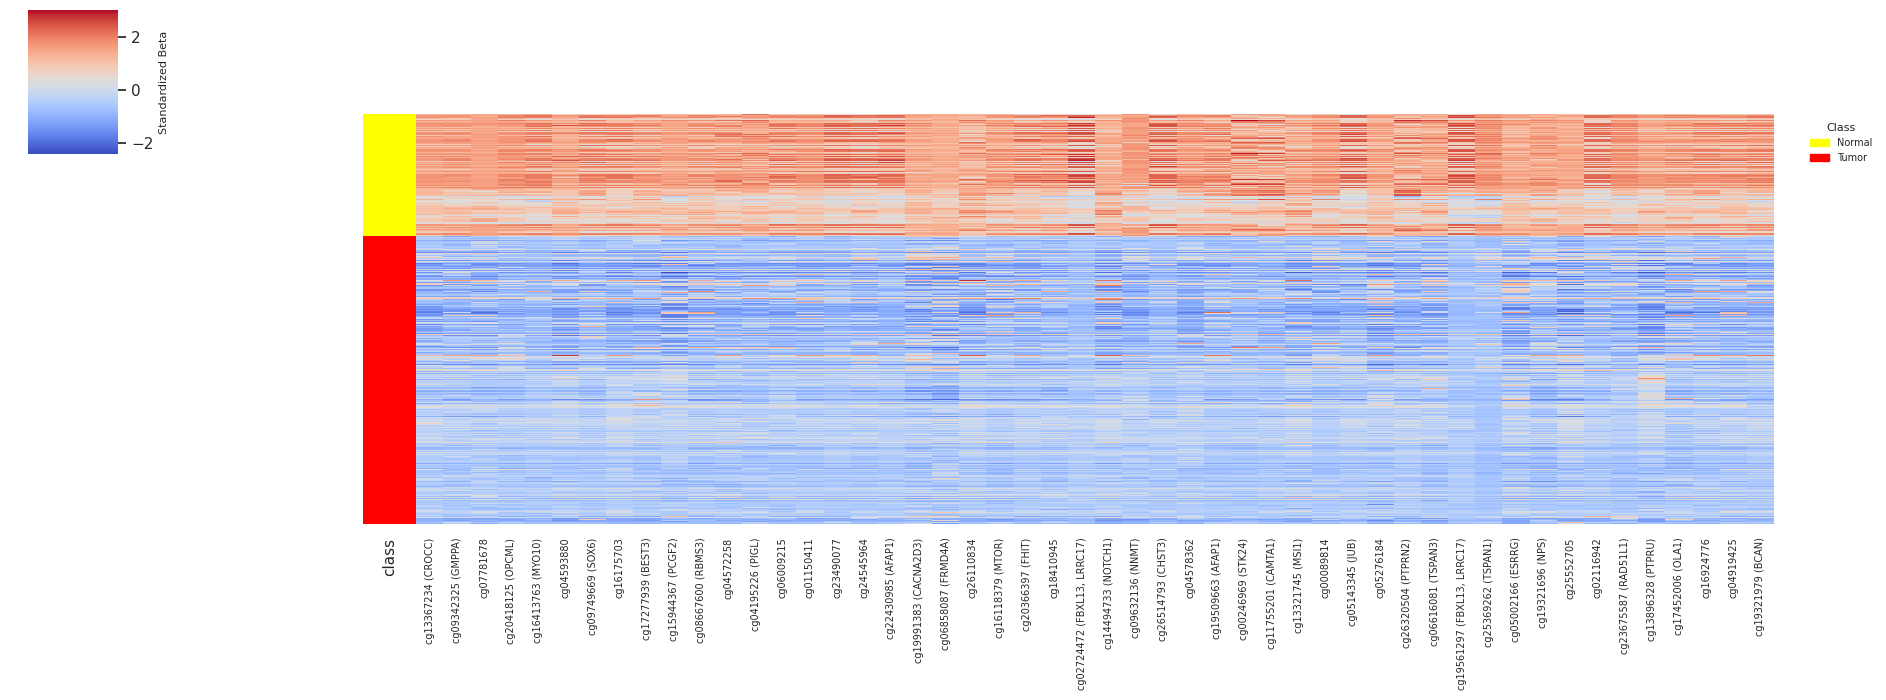

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

# 1️⃣ Top 50 CpGs by MI score
top_mi_cpgs = merged_mi_df.sort_values('MI_Score', ascending=False).head(50)['CpG'].tolist()

# 2️⃣ Annotation & cleaned gene labels
annot_mi = pd.read_csv("/content/Cpg-Gene-Region-MI.csv").rename(columns={"Name": "CpG", "UCSC_RefGene_Name": "Gene"})

def clean_gene(g):
    if pd.isna(g) or g == "":
        return ""
    genes = {s.strip() for s in str(g).replace(';', ',').split(',') if s.strip()}
    return ", ".join(sorted(genes))

gene_map = {row['CpG']: clean_gene(row['Gene']) for _, row in annot_mi.iterrows()}

def cpg_label(cpg):
    gene = gene_map.get(cpg, "")
    return f"{cpg} ({gene})" if gene else cpg

col_labels = [cpg_label(cpg) for cpg in top_mi_cpgs]

# 3️⃣ Scale and prepare
X_mi_subset = X_imputed[top_mi_cpgs].copy()
X_scaled_mi = pd.DataFrame(StandardScaler().fit_transform(X_mi_subset), columns=col_labels)
X_scaled_mi['class'] = y.values
X_scaled_mi = X_scaled_mi.sort_values('class')

# Row colour map (Normal=0 → yellow, Tumor=1 → red)
row_colors = X_scaled_mi['class'].map({0: 'yellow', 1: 'red'})
heatmap_data = X_scaled_mi.drop(columns='class')

# 4️⃣ Heatmap (no clustering, small font)
sns.set(style="white")
cg = sns.clustermap(
    heatmap_data,
    cmap='coolwarm',
    row_colors=row_colors,
    row_cluster=False,
    col_cluster=False,
    yticklabels=False,
    xticklabels=True,
    figsize=(18, 8),
    cbar_kws={'label': 'Standardized Beta'}
)

# Smaller x-tick font
cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xticklabels(), fontsize=7, rotation=90)
cg.ax_cbar.set_ylabel("Standardized Beta", fontsize=8)

# Add a legend for the class bar
normal_patch = mpatches.Patch(color='yellow', label='Normal')
tumor_patch = mpatches.Patch(color='red', label='Tumor')
cg.ax_heatmap.legend(
    handles=[normal_patch, tumor_patch],
    title="Class",
    bbox_to_anchor=(1.02, 1), loc='upper left',
    fontsize=7, title_fontsize=8, frameon=False
)


# 5️⃣ Save to file (high resolution PNG)
cg.savefig("/content/MI_Top50_Heatmap.png", dpi=300, bbox_inches='tight')

plt.show()






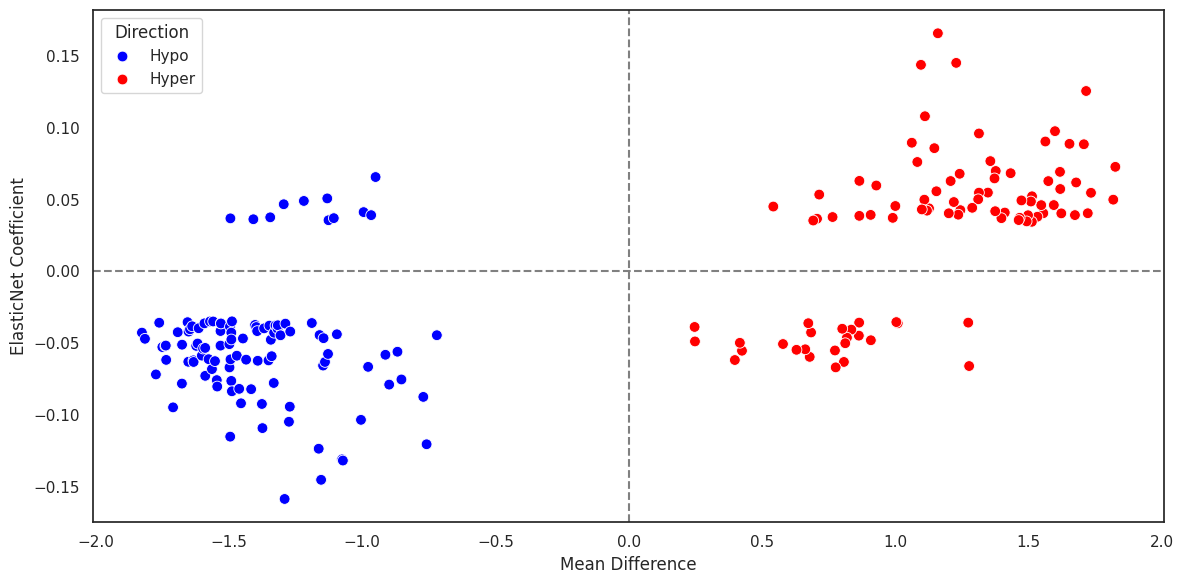

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 🔹 Load the merged ElasticNet CSV
merged_df = pd.read_csv("/content/ElasticNet_Merged_Table.csv")

# 🔹 Merge coefficient info
elastic_df_plot = pd.merge(merged_df, coef_df, on='CpG', how='left')

# 🔹 Compute direction if not already present
if 'Direction' not in elastic_df_plot.columns:
    elastic_df_plot['Direction'] = elastic_df_plot['Mean_Diff (Cancer - Normal)'].apply(
        lambda x: 'Hyper' if x > 0 else 'Hypo'
    )

# =======================
# 🔹 Scatter Plot (Mean Difference vs Coefficient)
# =======================
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='Mean_Diff (Cancer - Normal)',
    y='Coefficient',
    hue='Direction',
    palette={'Hyper':'red', 'Hypo':'blue'},
    data=elastic_df_plot,
    s=60
)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Mean Difference")
plt.ylabel("ElasticNet Coefficient")
plt.legend(title="Direction")
plt.tight_layout()

# 🔹 Save and download
plot_path = "/content/ElasticNet_Scatter.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

files.download(plot_path)



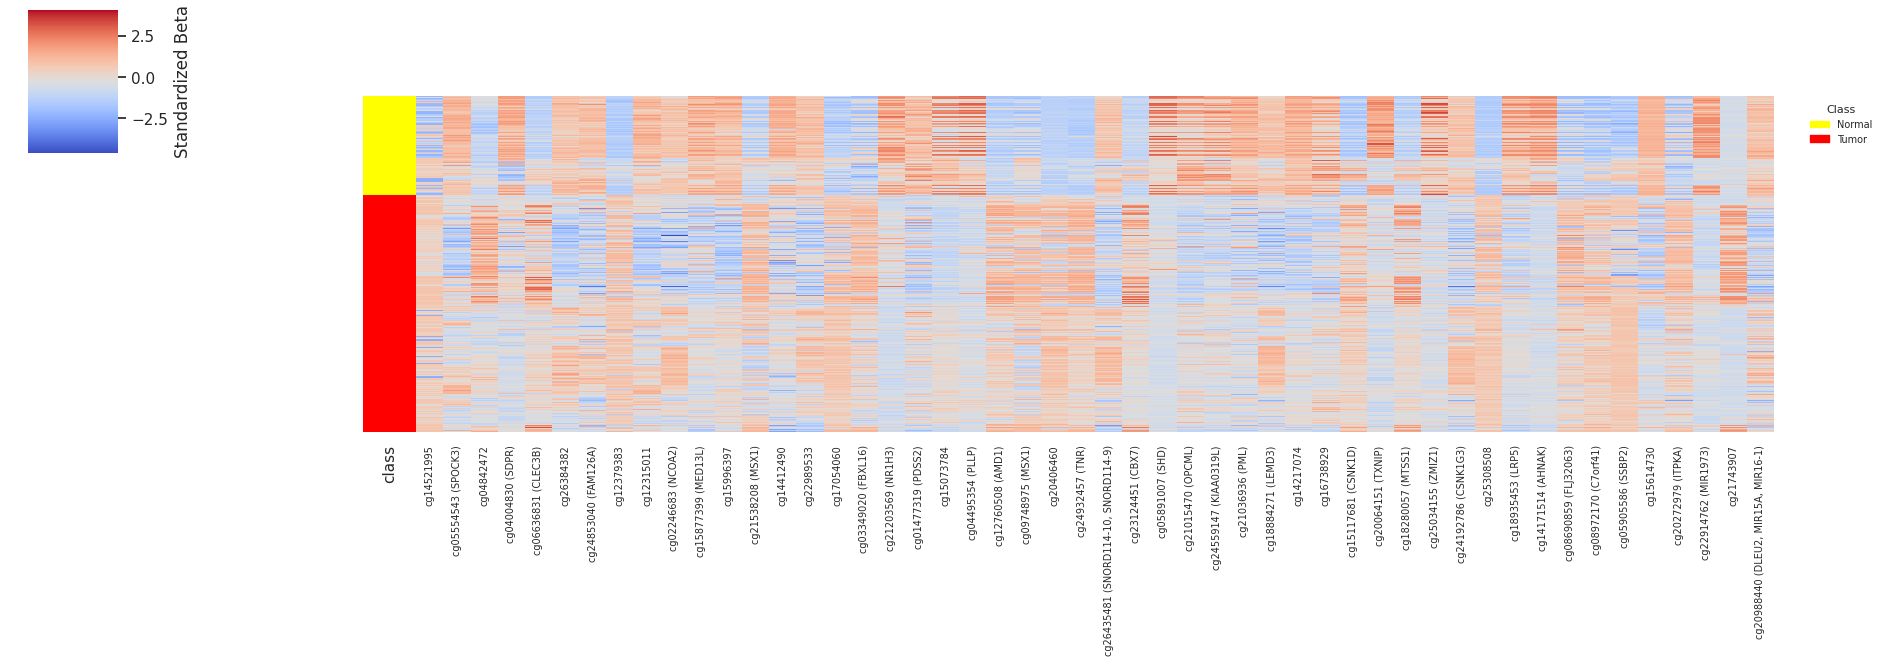

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 1️⃣ Top 50 CpGs by absolute ElasticNet coefficient
top_en_cpgs_list = merged_en_df.reindex(
    merged_en_df['Coefficient'].abs().sort_values(ascending=False).index
).head(50)['CpG'].tolist()

# 2️⃣ Read annotation file and make a CpG → gene mapping
annot_en = pd.read_csv("/content/Cpg-Gene-Region-ElasticNet.csv") \
            .rename(columns={"Name": "CpG", "UCSC_RefGene_Name": "Gene"})

def clean_gene(g):
    if pd.isna(g) or g == "":
        return ""
    genes = {s.strip() for s in str(g).replace(';', ',').split(',') if s.strip()}
    return ", ".join(sorted(genes))

gene_map_en = {row['CpG']: clean_gene(row['Gene']) for _, row in annot_en.iterrows()}

def label_cpg(cpg):
    gene = gene_map_en.get(cpg, "")
    return f"{cpg} ({gene})" if gene else cpg

col_labels_en = [label_cpg(c) for c in top_en_cpgs_list]

# 3️⃣ Subset, scale, add class
X_en_subset = X_imputed[top_en_cpgs_list].copy()
X_scaled_en = pd.DataFrame(StandardScaler().fit_transform(X_en_subset), columns=col_labels_en)
X_scaled_en['class'] = y.values
X_scaled_en = X_scaled_en.sort_values('class')

# 4️⃣ Row colours
row_colors = X_scaled_en['class'].map({0: 'yellow', 1: 'red'})
heatmap_data_en = X_scaled_en.drop(columns='class')

# 5️⃣ Heatmap (no clustering, small font)
sns.set(style="white")
cg_en = sns.clustermap(
    heatmap_data_en,
    cmap='coolwarm',
    row_colors=row_colors,
    row_cluster=False,    # no clustering
    col_cluster=False,
    yticklabels=False,
    xticklabels=True,
    figsize=(18, 8),
    cbar_kws={'label': 'Standardized Beta'}
)

# Shrink tick label font
cg_en.ax_heatmap.set_xticklabels(cg_en.ax_heatmap.get_xticklabels(), fontsize=7, rotation=90)

# 6️⃣ Legend for the coloured bar
normal_patch = mpatches.Patch(color='yellow', label='Normal')
tumor_patch = mpatches.Patch(color='red', label='Tumor')
cg_en.ax_heatmap.legend(handles=[normal_patch, tumor_patch],
                        title="Class",
                        bbox_to_anchor=(1.02, 1), loc='upper left',
                        fontsize=7, title_fontsize=8, frameon=False)
cg.savefig("/content/ElasticNet_Top50_Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 🔷 Set style
sns.set_theme(style="whitegrid", context="talk")

# 🔹 Top 5 ElasticNet CpGs
top5_elastic_cpgs = coef_df.head(5)['CpG'].tolist()

for cpg in top5_elastic_cpgs:
    plt.figure(figsize=(6, 5))

    sns.violinplot(
        x=y.astype(str),
        y=X_scaled[cpg],
        inner=None,
        palette={'0': '#FFD700', '1': '#FF4500'},  # yellow=normal, red=cancer
        cut=0
    )

    # Add median points
    medians = X_scaled.groupby(y)[cpg].median()
    for idx, median in enumerate(medians):
        plt.scatter(idx, median, color="black", marker="o", s=60, zorder=3)

    # Labels & formatting
    plt.title(f"{cpg}", fontsize=14, weight="bold")
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Standardized Beta Value", fontsize=12)
    plt.xticks([0, 1], ["Normal (0)", "Cancer (1)"], fontsize=11)
    plt.tight_layout()

    # Save plot
    filename = f"/content/violin_plot_{cpg}_ElasticNet.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# 🔹 Top 5 MI CpGs
top5_mi_cpgs = merged_mi_df.head(5)['CpG'].tolist()

for cpg in top5_mi_cpgs:
    plt.figure(figsize=(6, 5))

    sns.violinplot(
        x=y.astype(str),
        y=X_scaled[cpg],
        inner=None,
        palette={'0': '#FFD700', '1': '#FF4500'},
        cut=0
    )

    # Add median points
    medians = X_scaled.groupby(y)[cpg].median()
    for idx, median in enumerate(medians):
        plt.scatter(idx, median, color="black", marker="o", s=60, zorder=3)

    # Labels & formatting
    plt.title(f"{cpg}", fontsize=14, weight="bold")
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Standardized Beta Value", fontsize=12)
    plt.xticks([0, 1], ["Normal (0)", "Cancer (1)"], fontsize=11)
    plt.tight_layout()

    # Save plot
    filename = f"/content/violin_plot_{cpg}_MI.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

print("✅ Saved violin plots for top 5 ElasticNet and MI CpGs in /content/")



/tmp/ipython-input-4144097837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4144097837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4144097837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4144097837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4144097837.py:14: FutureWarni

✅ Saved violin plots for top 5 ElasticNet and MI CpGs in /content/


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'  # or simply remove custom font
